In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#train = pd.read_csv("trip_train.csv")
train = pd.read_csv("trip_train.csv")
train.head()

c:\python37\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,N,1.0,264,264,5.0,0.00,3.5,0.50,0.5,0.01,0.0,NaN,0.3,4.81,1.0,1.0,0.00
1,2.0,01/01/2020 00:45,01/01/2020 00:56,N,5.0,66,65,2.0,1.28,20.0,0.00,0.0,4.06,0.0,NaN,0.3,24.36,1.0,2.0,0.00
2,2.0,01/01/2020 00:41,01/01/2020 00:52,N,1.0,181,228,1.0,2.47,10.5,0.50,0.5,3.54,0.0,NaN,0.3,15.34,1.0,1.0,0.00
3,1.0,01/01/2020 00:52,01/01/2020 01:14,N,1.0,129,263,2.0,6.30,21.0,3.25,0.5,0.00,0.0,NaN,0.3,25.05,2.0,1.0,2.75
4,1.0,01/01/2020 00:19,01/01/2020 00:30,N,1.0,210,150,1.0,2.30,10.0,0.50,0.5,0.00,0.0,NaN,0.3,11.30,1.0,1.0,0.00


### Feature selection

In [3]:
# First of all, there are some features like fare_amount,extra,mta_tax,tip_amount etc. 
#addition of all these columns is a final column named total_amount.
# so we need to manually remove those irrelevant columns
#payment_type is also a post fare process, so we don't need it
train = train.drop(['fare_amount','extra','mta_tax','tip_amount','tolls_amount','ehail_fee','improvement_surcharge','congestion_surcharge','payment_type'], axis = 1)
train.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount,trip_type
0,2.0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,N,1.0,264,264,5.0,0.00,4.81,1.0
1,2.0,01/01/2020 00:45,01/01/2020 00:56,N,5.0,66,65,2.0,1.28,24.36,2.0
2,2.0,01/01/2020 00:41,01/01/2020 00:52,N,1.0,181,228,1.0,2.47,15.34,1.0
3,1.0,01/01/2020 00:52,01/01/2020 01:14,N,1.0,129,263,2.0,6.30,25.05,1.0
4,1.0,01/01/2020 00:19,01/01/2020 00:30,N,1.0,210,150,1.0,2.30,11.30,1.0


In [4]:
#The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation

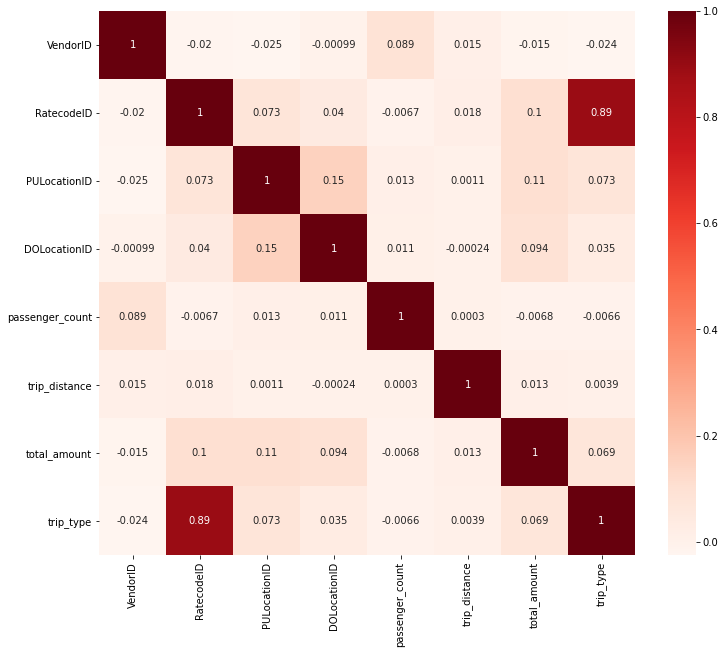

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
train.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'total_amount', 'trip_type'],
      dtype='object')

In [7]:
#Correlation with output variable
cor_target = abs(cor["total_amount"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

VendorID           0.014979
RatecodeID         0.103748
PULocationID       0.105281
DOLocationID       0.094026
passenger_count    0.006788
trip_distance      0.013413
total_amount       1.000000
trip_type          0.069422
Name: total_amount, dtype: float64

In [8]:
#correlation function ignores the values which are not numbers, 
#hence manually adding datetime columns to relevant_features
relevant_features = relevant_features.keys().to_numpy()
relevant_features = np.append(relevant_features,'lpep_pickup_datetime')
relevant_features = np.append(relevant_features,'lpep_dropoff_datetime')
relevant_features

array(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'total_amount', 'trip_type',
       'lpep_pickup_datetime', 'lpep_dropoff_datetime'], dtype=object)

In [9]:
train = train[relevant_features]
train.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount,trip_type,lpep_pickup_datetime,lpep_dropoff_datetime
0,2.0,1.0,264,264,5.0,0.00,4.81,1.0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM
1,2.0,5.0,66,65,2.0,1.28,24.36,2.0,01/01/2020 00:45,01/01/2020 00:56
2,2.0,1.0,181,228,1.0,2.47,15.34,1.0,01/01/2020 00:41,01/01/2020 00:52
3,1.0,1.0,129,263,2.0,6.30,25.05,1.0,01/01/2020 00:52,01/01/2020 01:14
4,1.0,1.0,210,150,1.0,2.30,11.30,1.0,01/01/2020 00:19,01/01/2020 00:30


## Data Preprocessing

In [10]:
train.shape

(1048575, 10)

In [11]:
train.dropna(inplace=True)

In [12]:
train.shape

(825742, 10)

In [13]:
#convert pickup & dropoff time to DateTime format
train["lpep_pickup_datetime"] = pd.to_datetime(train['lpep_pickup_datetime'], unit='ns')
train["lpep_dropoff_datetime"] = pd.to_datetime(train['lpep_dropoff_datetime'], unit='ns')

In [14]:
train['travel_time'] = train["lpep_dropoff_datetime"] - train["lpep_pickup_datetime"]
train['travel_time']

0         0 days 00:02:09
1         0 days 00:11:00
2         0 days 00:11:00
3         0 days 00:22:00
4         0 days 00:11:00
                ...      
1022861   0 days 00:05:14
1022862   0 days 00:22:47
1022863   0 days 00:07:50
1022864   0 days 00:03:20
1022865   0 days 00:17:41
Name: travel_time, Length: 825742, dtype: timedelta64[ns]

In [15]:
def toMinutes(x):
    minutes = x.total_seconds() / 60
    return minutes

In [16]:
train['travel_time'] = train['travel_time'].apply(lambda x: toMinutes(x))
#minutes = a.total_seconds() / 60
train['travel_time']

0           2.150000
1          11.000000
2          11.000000
3          22.000000
4          11.000000
             ...    
1022861     5.233333
1022862    22.783333
1022863     7.833333
1022864     3.333333
1022865    17.683333
Name: travel_time, Length: 825742, dtype: float64

In [17]:
#train["lpep_dropoff_datetime"].today().weekday()
train['travel_weekday'] = train['lpep_dropoff_datetime'].apply(lambda x: x.weekday())
train['travel_weekday']

0          2
1          2
2          2
3          2
4          2
          ..
1022861    1
1022862    1
1022863    1
1022864    1
1022865    1
Name: travel_weekday, Length: 825742, dtype: int64

In [18]:
train['travel_weekday'].unique()

array([2, 1, 3, 4, 5, 0, 6], dtype=int64)

In [19]:
train['travel_hour'] = train['lpep_dropoff_datetime'].apply(lambda x: x.hour)
train['travel_hour']

0          15
1           0
2           0
3           1
4           0
           ..
1022861    23
1022862    23
1022863    23
1022864    23
1022865    23
Name: travel_hour, Length: 825742, dtype: int64

In [20]:
train['travel_hour'].unique()

array([15,  0,  1, 23, 21,  2,  3, 19, 22, 18,  4,  5,  6,  7, 10,  8, 11,
        9, 12, 13, 14, 17, 16, 20], dtype=int64)

In [58]:
booking_by_day =  train.groupby('travel_weekday')['travel_weekday'].count()
type(booking_by_day)

pandas.core.series.Series

In [21]:
train.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount,trip_type,lpep_pickup_datetime,lpep_dropoff_datetime,travel_time,travel_weekday,travel_hour
0,2.0,1.0,264,264,5.0,0.00,4.81,1.0,2019-12-18 15:52:30,2019-12-18 15:54:39,2.15,2,15
1,2.0,5.0,66,65,2.0,1.28,24.36,2.0,2020-01-01 00:45:00,2020-01-01 00:56:00,11.00,2,0
2,2.0,1.0,181,228,1.0,2.47,15.34,1.0,2020-01-01 00:41:00,2020-01-01 00:52:00,11.00,2,0
3,1.0,1.0,129,263,2.0,6.30,25.05,1.0,2020-01-01 00:52:00,2020-01-01 01:14:00,22.00,2,1
4,1.0,1.0,210,150,1.0,2.30,11.30,1.0,2020-01-01 00:19:00,2020-01-01 00:30:00,11.00,2,0


In [22]:
#Once we got current day & hour of the trip, we don't need pickup & dropoff times, so removing it
train = train.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'], axis = 1)
train.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount,trip_type,travel_time,travel_weekday,travel_hour
0,2.0,1.0,264,264,5.0,0.00,4.81,1.0,2.15,2,15
1,2.0,5.0,66,65,2.0,1.28,24.36,2.0,11.00,2,0
2,2.0,1.0,181,228,1.0,2.47,15.34,1.0,11.00,2,0
3,1.0,1.0,129,263,2.0,6.30,25.05,1.0,22.00,2,1
4,1.0,1.0,210,150,1.0,2.30,11.30,1.0,11.00,2,0


## labels and features

In [23]:
y = train.iloc[0:,[6]]
y.head()

,total_amount
0,4.81
1,24.36
2,15.34
3,25.05
4,11.30


In [24]:
x = train.iloc[0:,[0,1,2,3,4,5,7,8,9,10]]
x.head()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,trip_type,travel_time,travel_weekday,travel_hour
0,2.0,1.0,264,264,5.0,0.00,1.0,2.15,2,15
1,2.0,5.0,66,65,2.0,1.28,2.0,11.00,2,0
2,2.0,1.0,181,228,1.0,2.47,1.0,11.00,2,0
3,1.0,1.0,129,263,2.0,6.30,1.0,22.00,2,1
4,1.0,1.0,210,150,1.0,2.30,1.0,11.00,2,0


In [25]:
x.dtypes

VendorID           float64
RatecodeID         float64
PULocationID         int64
DOLocationID         int64
passenger_count    float64
trip_distance      float64
trip_type          float64
travel_time        float64
travel_weekday       int64
travel_hour          int64
dtype: object

In [26]:
y.dtypes

total_amount    float64
dtype: object

## Visualization

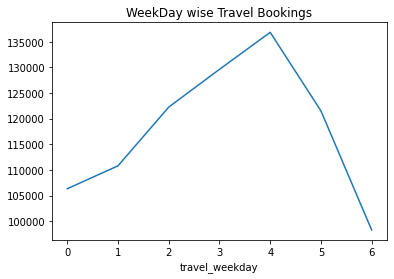

In [60]:
booking_by_day.plot()
plt.title('WeekDay wise Travel Bookings')
plt.show()

Text(0.5, 1.0, ' Dist of passanger count ')

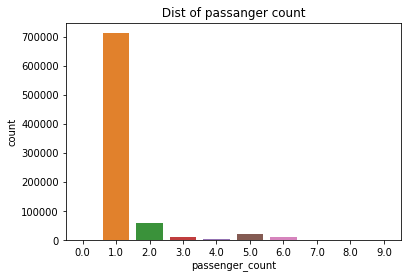

In [27]:
ax = sns.countplot(x=train['passenger_count'])
plt.title(' Dist of passanger count ')

In [28]:
%%script false --no-raise-error
train['travel_hour'].hist(bins=24, ax=ax[0])
ax[0].set_title(' dist of pickup hours ')
plt.tight_layout()

Couldn't find program: 'false'


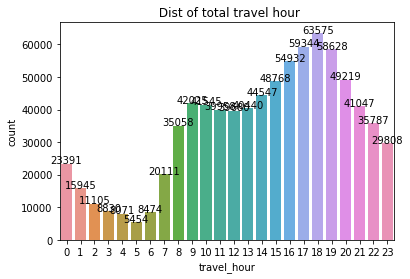

In [29]:
ax = sns.countplot(x=train['travel_hour'])
plt.title(' Dist of total travel hour')

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2, ha='center', s='{:.0f}'.format(height))
plt.show()

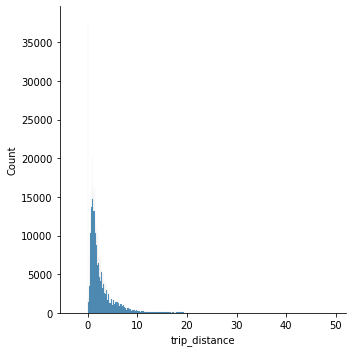

In [30]:
sns.displot(train[train['trip_distance']<50]['trip_distance'],kde=False);

In [31]:
#Plotting graph of fare vs distance

In [32]:
a = x.iloc[0:200,5]
b = y.iloc[0:200,0]

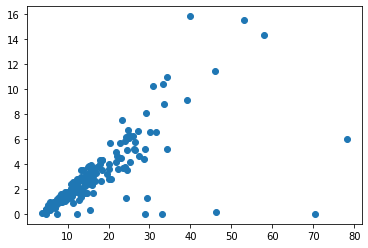

In [33]:
plt.scatter(b,a)
plt.title('fare vs distance')
plt.show()

## Splitting values for Training & Testing

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Training using Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
y_predicted = lr.predict(x_test)
print("Linear Regression Score: ", lr.score(x_test,y_test))
err = mean_squared_error(y_test,y_predicted)
print('Mean Squared Err: ', err)

Linear Regression Score:  0.07357774616465473
Mean Squared Err:  126.8142601522355


## Training using Polynomial Regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(2)
X_train_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

In [51]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

In [52]:
print("The Polynomial model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))  
print("\n")

print("The Polynomial model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The Polynomial model performance for the training set
-------------------------------------------
RMSE of training set is 5.431563990582172
R2 score of training set is 0.7847523177835105


The Polynomial model performance for the test set
-------------------------------------------
RMSE of test set is 198.7856964871646
R2 score of test set is -287.6763131432656


## Training using Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=30, n_estimators=100, n_jobs=-1)

model.fit(x_train, y_train.values.ravel())

y_valid_pred = model.predict(x_test)


In [41]:
print("Random Forest Regressor Score: ", lr.score(x_test,y_test))
rmse_test = np.sqrt(mean_squared_error(y_test, y_valid_pred))
print("Random Forest Regressor RMSE: " , rmse_test)

Random Forest Regressor Score:  0.07357774616465473
Random Forest Regressor RMSE:  4.369182593272292


## Training using Logistic Regression

In [42]:
%%script false --no-raise-error
import statsmodels.api as sm
y["total_amount"] = np.divide(y["total_amount"] - y["total_amount"].min(), y["total_amount"].max() - y["total_amount"].min())
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Couldn't find program: 'false'


In [43]:
y

,total_amount
0,4.81
1,24.36
2,15.34
3,25.05
4,11.30
...,...
1022861,7.80
1022862,34.75
1022863,10.30
1022864,9.05


In [44]:
%%script false --no-raise-error
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test,y_test))

Couldn't find program: 'false'
